<a href="https://colab.research.google.com/github/rayamajhiumang5-cloud/Applied-Data-analysis-/blob/main/Lab_3_(inclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: ARM (Armenia), UMC (Upper Middle Income), WLD (World)
country_codes = ['ARM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [11]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Armenia for specific calculations
df_arm = df.xs('ARM', axis=1, level=0).copy()


Fetching data...


In [6]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_arm['Natural_Rate_Unemp'] = df_arm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_arm['Productivity'] = df_arm['GDP_Const'] / df_arm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_arm['NCO'] = df_arm['Exports_GDP'] - df_arm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_arm['Budget_Balance'] = df_arm['Tax_Rev_GDP'] - df_arm['Gov_Exp_GDP']

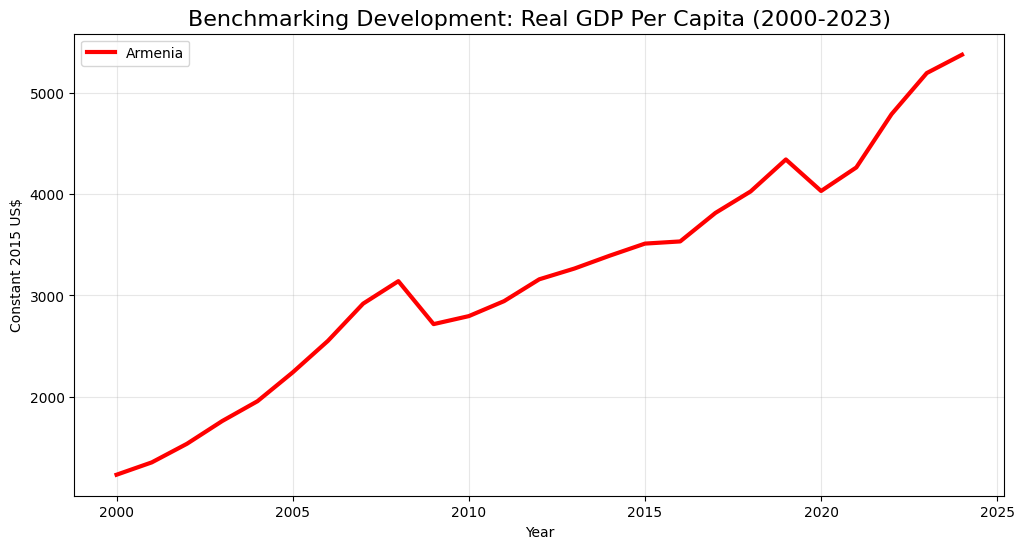

In [7]:
plt.figure(figsize=(12, 6))
# Plot ONLY Armenia
plt.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], label='Armenia', color='red', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

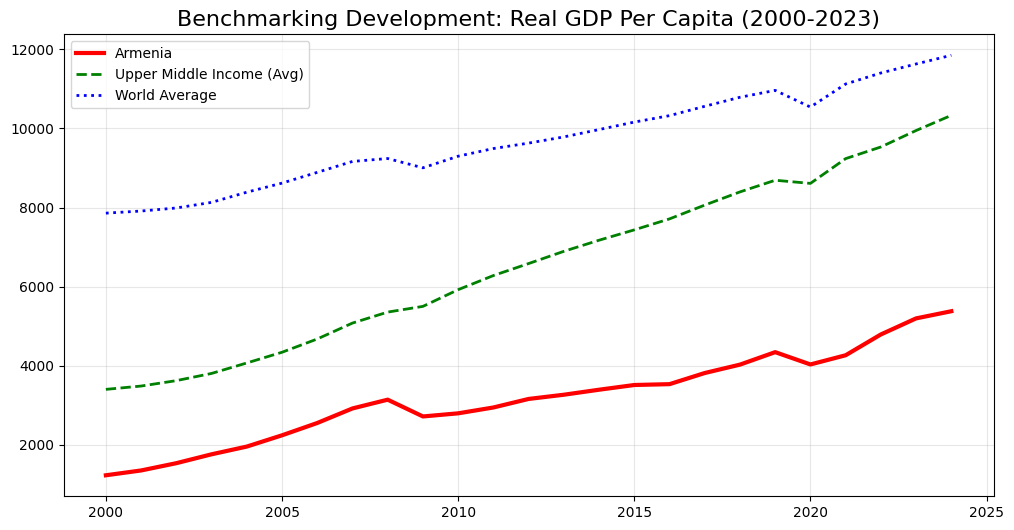

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], label='Armenia', color='red', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='green', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='blue', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

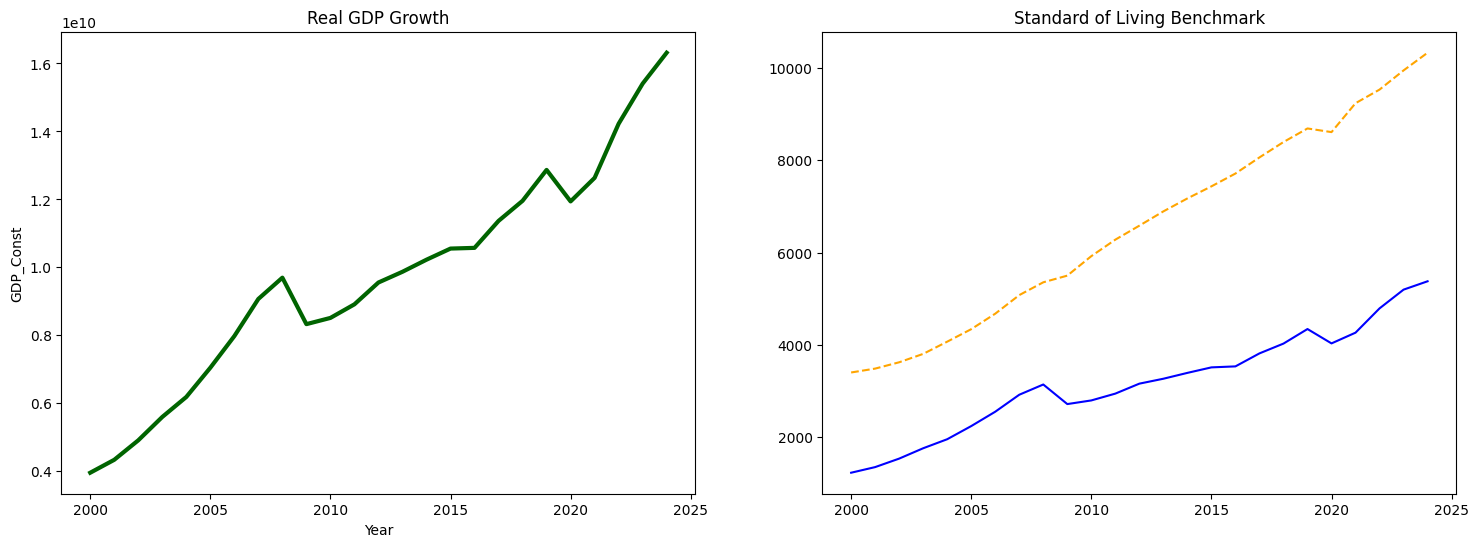

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_arm, x=df_arm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

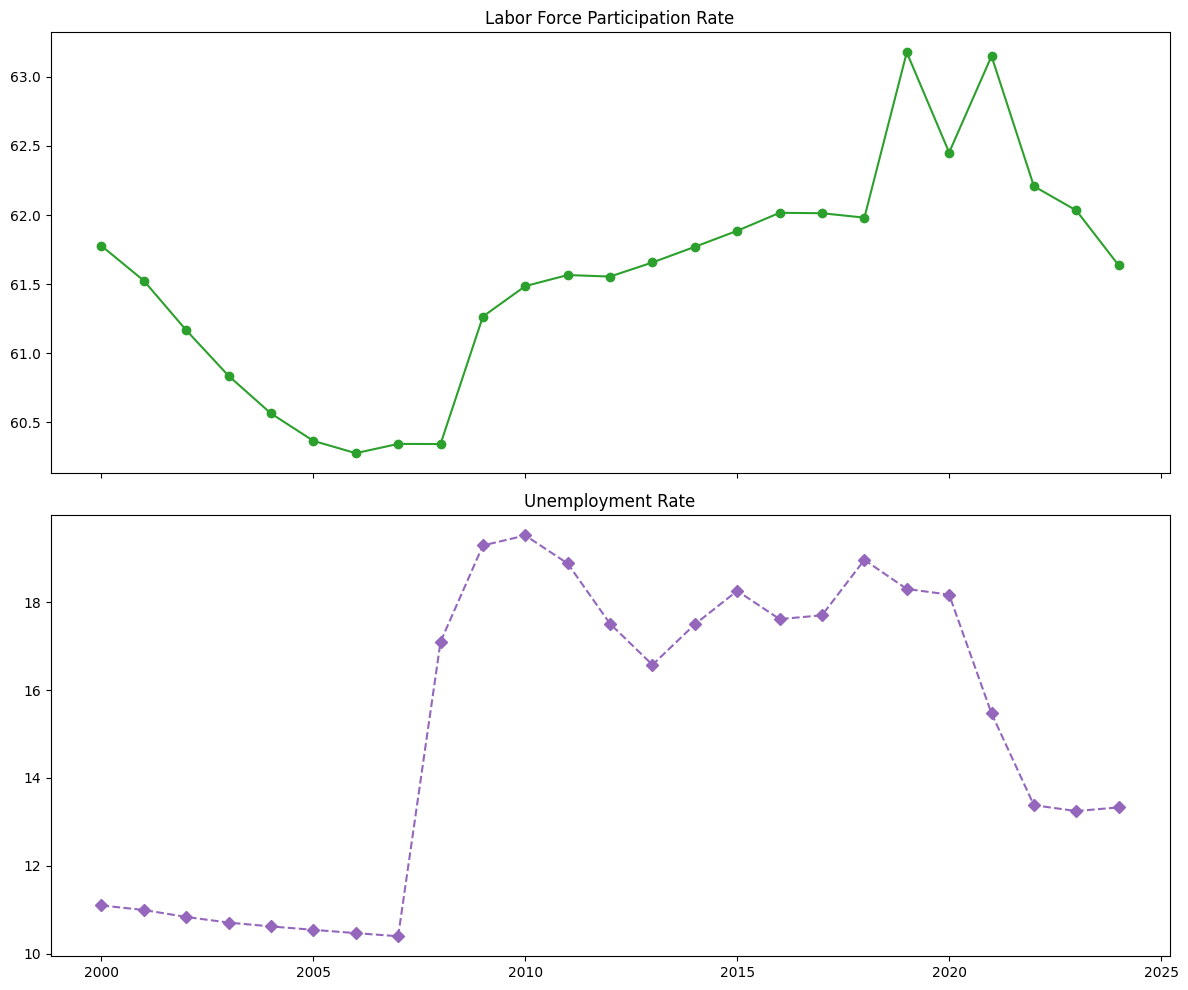

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_arm.index, df_arm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_arm.index, df_arm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

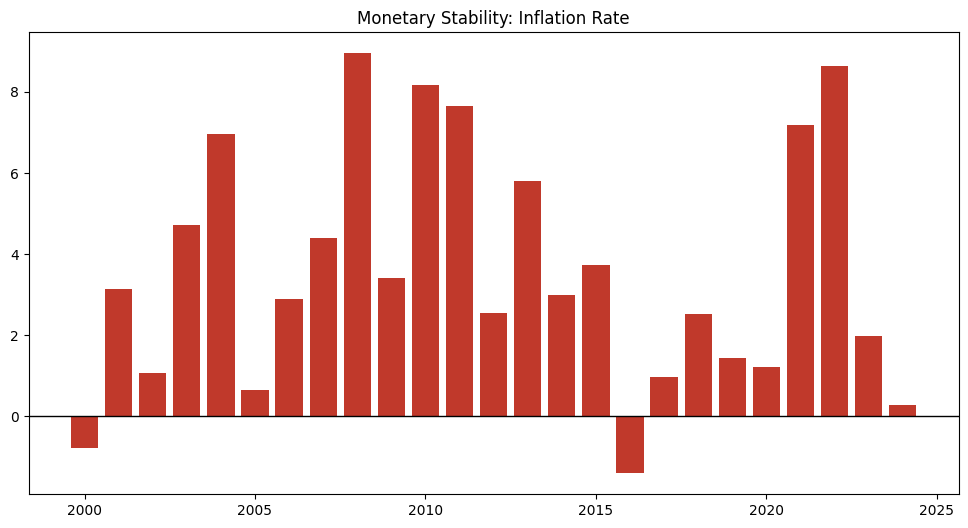

In [13]:
plt.figure(figsize=(12, 6))

plt.bar(df_arm.index, df_arm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

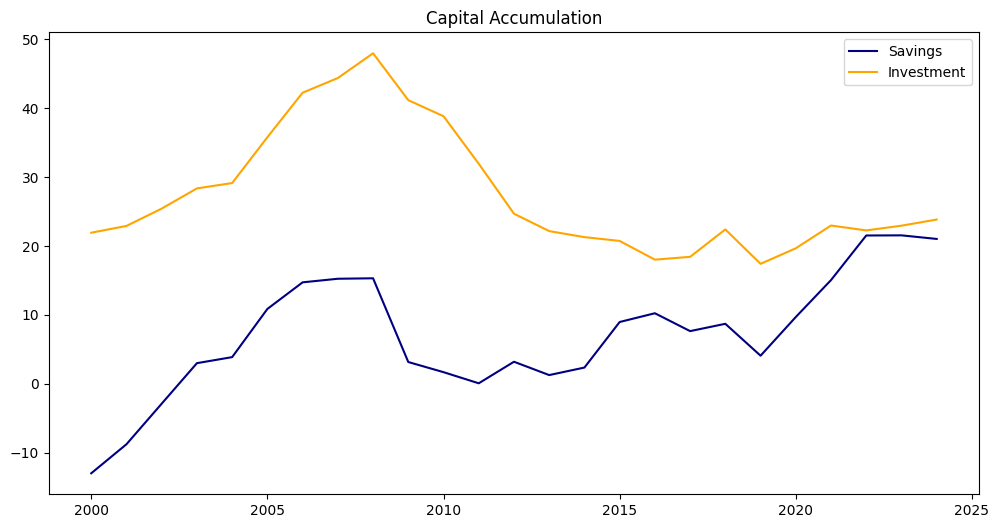

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_arm.index, df_arm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_arm.index, df_arm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

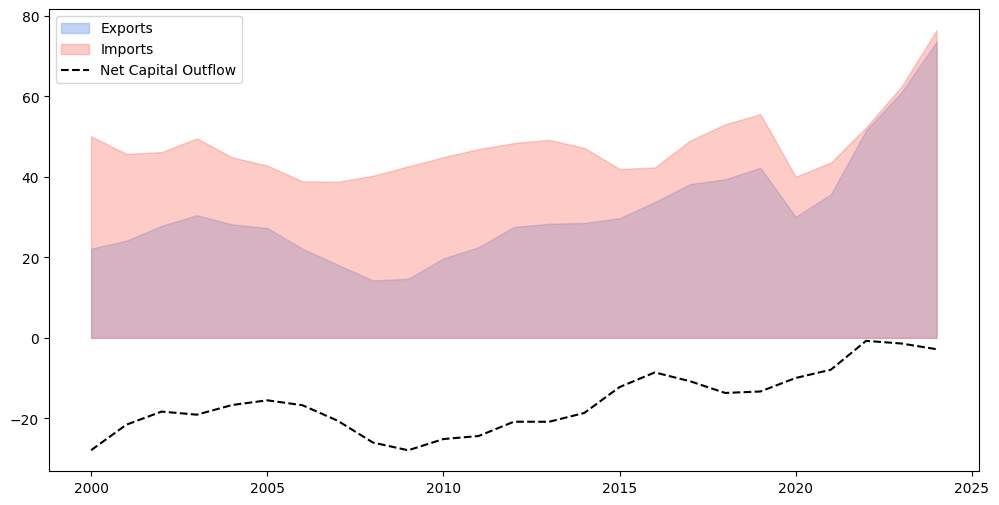

In [18]:
plt.figure(figsize=(12, 6))
df_arm['NCO'] = df_arm['Exports_GDP'] - df_arm['Imports_GDP']
plt.fill_between(df_arm.index, df_arm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_arm.index, df_arm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_arm.index, df_arm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

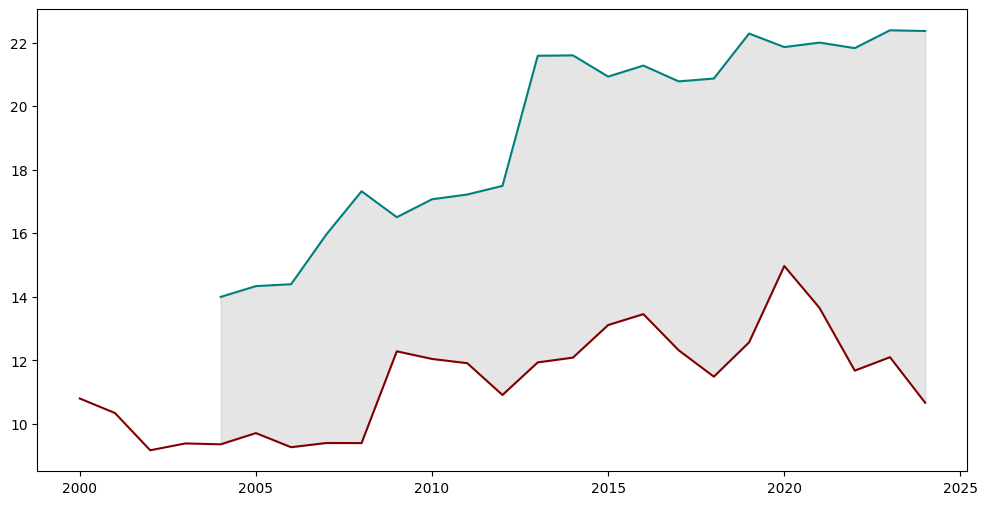

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_arm.index, df_arm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_arm.index, df_arm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_arm.index, df_arm['Tax_Rev_GDP'], df_arm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

In [20]:
df.loc[2023, [('ARM', 'GDP_Per_Capita_Const'),
              ('UMC', 'GDP_Per_Capita_Const')]]

,,2023
economy,series,
ARM,GDP_Per_Capita_Const,5197.235090
UMC,GDP_Per_Capita_Const,9948.674954


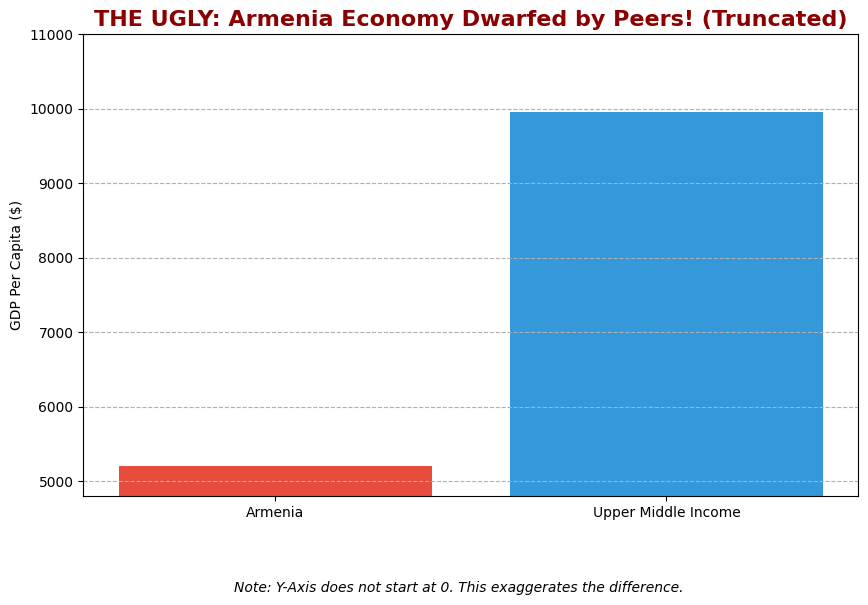

In [22]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
arm_val = df.loc[snapshot_year, ('ARM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [arm_val, umc_val]
labels = ['Armenia', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Armenia is approx 4800. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4800, 11000)

plt.title('THE UGLY: Armenia Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

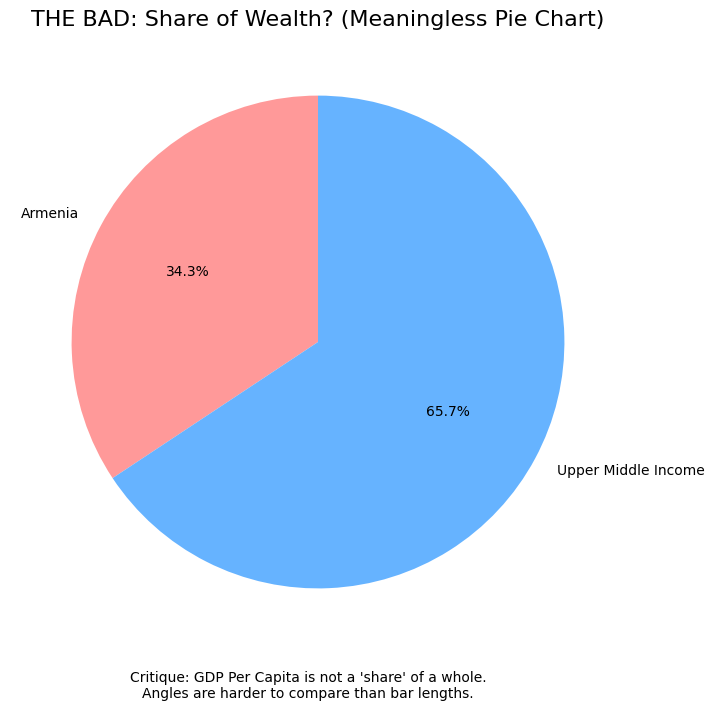

In [23]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

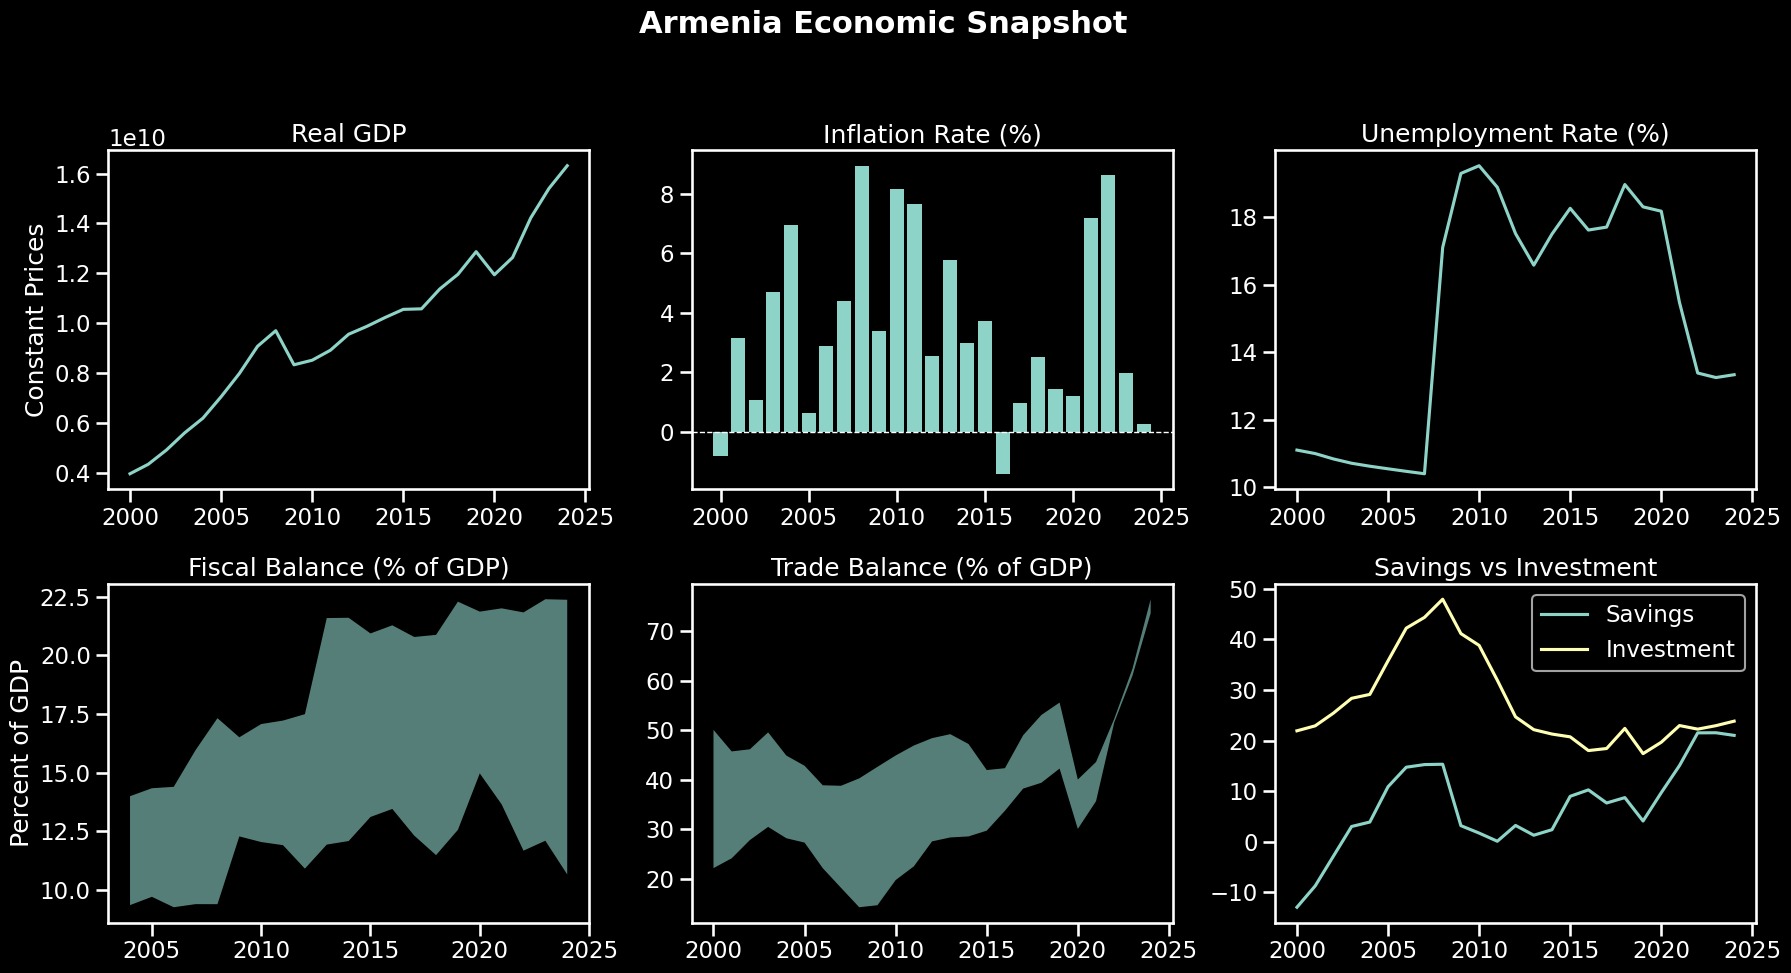

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Global style
# -----------------------------
plt.style.use("dark_background")
sns.set_context("talk")

# -----------------------------
# Create 2x3 dashboard
# -----------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# =============================
# Top Row
# =============================

# (1) Real GDP — Line chart
axes[0, 0].plot(df_arm.index, df_arm["GDP_Const"])
axes[0, 0].set_title("Real GDP")
axes[0, 0].set_ylabel("Constant Prices")

# (2) Inflation — Bar chart with zero line
axes[0, 1].bar(df_arm.index, df_arm["Inflation_CPI"])
axes[0, 1].axhline(0, linestyle="--", linewidth=1)
axes[0, 1].set_title("Inflation Rate (%)")

# (3) Unemployment — Line chart
axes[0, 2].plot(df_arm.index, df_arm["Unemployment_Rate"])
axes[0, 2].set_title("Unemployment Rate (%)")

# =============================
# Bottom Row
# =============================

# (4) Fiscal Balance — Tax Revenue vs Government Expenditure
axes[1, 0].fill_between(
    df_arm.index,
    df_arm["Tax_Rev_GDP"],
    df_arm["Gov_Exp_GDP"],
    alpha=0.6
)
axes[1, 0].set_title("Fiscal Balance (% of GDP)")
axes[1, 0].set_ylabel("Percent of GDP")

# (5) Trade Balance — Exports vs Imports
axes[1, 1].fill_between(
    df_arm.index,
    df_arm["Exports_GDP"],
    df_arm["Imports_GDP"],
    alpha=0.6
)
axes[1, 1].set_title("Trade Balance (% of GDP)")

# (6) Savings vs Investment — Dual lines
axes[1, 2].plot(
    df_arm.index,
    df_arm["Gross_Dom_Savings"],
    label="Savings"
)
axes[1, 2].plot(
    df_arm.index,
    df_arm["Gross_Cap_Formation"],
    label="Investment"
)
axes[1, 2].set_title("Savings vs Investment")
axes[1, 2].legend()

# -----------------------------
# Main title & layout
# -----------------------------
fig.suptitle("Armenia Economic Snapshot", fontsize=22, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
